<a href="https://colab.research.google.com/github/filipefigcorreia/hermit-study/blob/master/hermit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
projects_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/projects.csv', delimiter=";")
evaluations_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/evaluations.csv', delimiter=";")

In [5]:
projects_database

,name,count,url,status,build
0,huggingface/transformers,7,https://github.com/huggingface/transformers,discarded,NaN
1,home-assistant/core,2,https://github.com/home-assistant/core,discarded,NaN
2,DIYgod/RSSHub,1,https://github.com/DIYgod/RSSHub,accepted,successful
3,goldbergyoni/nodebestpractices,5,https://github.com/goldbergyoni/nodebestpractices,accepted,require-extra-steps
4,quantopian/zipline,2,https://github.com/quantopian/zipline,discarded,NaN
...,...,...,...,...,...
72,openstf/stf,4,https://github.com/openstf/stf,accepted,failed-build
73,liftoff/GateOne,1,https://github.com/liftoff/GateOne,discarded,NaN
74,schollz/howmanypeoplearearound,1,https://github.com/schollz/howmanypeoplearearound,accepted,failed-build
75,horovod/horovod,5,https://github.com/horovod/horovod,discarded,NaN


In [6]:
evaluations_database

,name,bloatRatio,missedDependencies,balance,ports,risk,entrypoint
0,athena,0.0,0.0,0,NaN,0,70.6
1,cowait,0.0,36.5,3771,NaN,0,100.0
2,vulcan,0.0,0.0,0,NaN,0,70.6
3,newTrackon,93.6,17.0,3635,100.0,0,100.0
4,sherlock,72.5,42.9,877454,NaN,0,100.0
5,k8s-sidecar,92.2,38.0,0,NaN,0,100.0
6,commuter,52.4,0.0,0,NaN,0,0.0
7,pipenv,21.5,84.7,56081719,NaN,0,100.0
8,RSSHub,27.1,1.1,18432,100.0,0,70.6
9,ZeroNet,97.4,1.3,-1256702,100.0,0,100.0


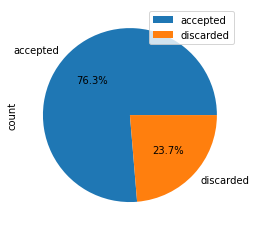

In [7]:
status_count = projects_database.groupby('status').count()
status_count.plot.pie(y='count', figsize=(4, 4), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'build'])
plt.savefig('status_pie.pdf', bbox_inches='tight')

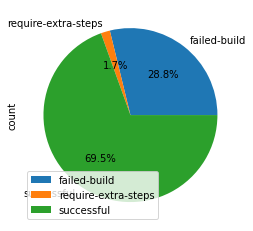

In [8]:
status_count = projects_database.groupby('build').count()
status_count.plot.pie(y='count', figsize=(4, 4), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'status'])
plt.savefig('build_pie.pdf', bbox_inches='tight')

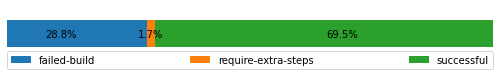

In [9]:
status_count['percent'] = status_count['count']/status_count['count'].sum() * 100
status_data = status_count.loc[:,['count','percent']]

status_data
df = pd.DataFrame(status_data['count'])
df = df.T
ax = df.plot.barh(stacked=True, figsize=(8.7,1))    
ax.axis('off')
cols = int(len(df.columns)/1)
ax.legend(bbox_to_anchor=(0, -0.15, 1, -0.15), loc='lower left',
           ncol=cols, mode="expand", borderaxespad=0.)
ax.margins(0,0)
fig = ax.get_figure()


offset = 0
percents = status_data['percent'].to_dict().values()
for i, v in enumerate(list(percents)):
    lbl = str(round(v,1))+'%'
    ax.text((offset+v/2)*0.67-len(str(lbl)), -0.06, lbl, color='black')
    offset += v

fig.savefig('build_bar.pdf', format='pdf', bbox_inches='tight', pad_inches = 0)


In [79]:
status_count

,name,count,url,status,percent
build,,,,,
failed-build,17,17,17,17,28.813559
require-extra-steps,1,1,1,1,1.694915
successful,41,41,41,41,69.491525


In [10]:
from matplotlib import rcParams
labelsize = 8
rcParams['ytick.labelsize'] = labelsize 
rcParams['xtick.labelsize'] = labelsize

In [11]:
def calculate_statistics(column):
  min = column.quantile(0.0)
  q1 = column.quantile(0.25)
  q2 = column.quantile(0.50)
  q3 = column.quantile(0.75)
  max = column.quantile(1.0)
  
  iqr = q3 - q1
  lb = q1 - (1.5 * iqr)
  ub = q3 + (1.5 * iqr)

  mean = column.mean()
  std = column.std()

  return min, q1, q2, q3, max, iqr, lb, ub, mean, std

In [12]:
renamed_evaluations = evaluations_database.rename(columns={
    'bloatRatio': 'Bloat Ratio',
    'missedDependencies': 'Missed Dependencies Ratio',
    'balance':'Balance',
    'ports': 'Ports Detection Accuracy',
    'risk': 'Risk Percentage',
    'entrypoint': 'Entrypoint Similarity'
})

Mean Bloat Ratio: 43.114999999999995 %
Min: 0.0
LB: -119.39999999999999
Q1: 0.0
Q2: 43.400000000000006
Q3: 79.6
UB: 199.0
Max: 97.4
IQR: 79.6
Standard Deviation: 37.7787523378569


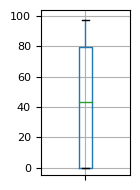

In [78]:
# Bloat Ratio

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['bloatRatio'])

print(f"Mean Bloat Ratio: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

fig = plt.figure(figsize=(1.5, 2), dpi=100)
ax = renamed_evaluations.boxplot(column=['Bloat Ratio'])
ax.set_ylim([-5,104])
plt.xticks([1], [''])
plt.tight_layout() 
plt.savefig('bloat-boxplot.pdf', bbox_inches='tight')

Mean Missed Dependencies Ratio: 22.342500000000005 %
Min: 0.0
LB: -65.925
Q1: 0.0
Q2: 1.2000000000000002
Q3: 43.949999999999996
UB: 109.875
Max: 84.7
IQR: 43.949999999999996
Standard Deviation: 28.798316256871157


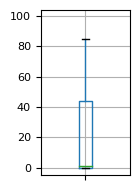

In [68]:
# Missed Dependencies Ratio

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['missedDependencies'])

print(f"Mean Missed Dependencies Ratio: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

fig = plt.figure(figsize=(1.5, 2), dpi=100)
ax = renamed_evaluations.boxplot(column=['Missed Dependencies Ratio'])
ax.set_ylim([-5,104])
plt.xticks([1], [''])
plt.tight_layout() 
plt.savefig('missed-dependencies-boxplot.pdf', bbox_inches='tight')

Mean Balance: 5.530309075 MB
Min: -9.459986
LB: -1.1976825
Q1: 0.0
Q2: 0.0
Q3: 0.798455
UB: 1.9961375
Max: 56.081719
IQR: 0.798455
Standard Deviation: 14.11682020623565


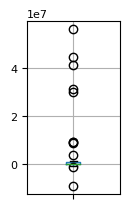

In [70]:
# Balance

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['balance'])

print(f"Mean Balance: {mean / 1000000} MB")
print(f"Min: {min / 1000000}")
print(f"LB: {lb / 1000000}")
print(f"Q1: {q1 / 1000000}")
print(f"Q2: {q2 / 1000000}")
print(f"Q3: {q3 / 1000000}")
print(f"UB: {ub / 1000000}")
print(f"Max: {max / 1000000}")
print(f"IQR: {iqr / 1000000}")
print(f"Standard Deviation: {std / 1000000}")

fig = plt.figure(figsize=(1.4, 2.2), dpi=100)
renamed_evaluations.boxplot(column=['Balance'])
plt.xticks([1], [''])
plt.tight_layout()
plt.savefig('balance-boxplot.pdf', bbox_inches='tight')

Mean Ports Detection Accuracy: 100.0 %
Min: 100.0
LB: 100.0
Q1: 100.0
Q2: 100.0
Q3: 100.0
UB: 100.0
Max: 100.0
IQR: 0.0
Standard Deviation: 0.0


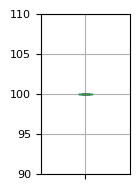

In [71]:
# Ports Detection Accuracy

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['ports'].dropna())

print(f"Mean Ports Detection Accuracy: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

fig = plt.figure(figsize=(1.5, 2), dpi=100)
ax = renamed_evaluations.boxplot(column=['Ports Detection Accuracy'])
ax.set_ylim([90,110])
plt.xticks([1], [''])
plt.tight_layout() 
plt.savefig('ports-boxplot.pdf', bbox_inches='tight')

Mean Risk Percentage: 0.0 %
Min: 0.0
LB: 0.0
Q1: 0.0
Q2: 0.0
Q3: 0.0
UB: 0.0
Max: 0.0
IQR: 0.0
Standard Deviation: 0.0


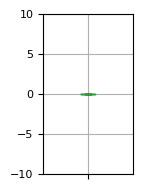

In [77]:
# Risk Percentage

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['risk'])

print(f"Mean Risk Percentage: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

fig = plt.figure(figsize=(1.53, 2), dpi=100)
ax = renamed_evaluations.boxplot(column=['Risk Percentage'])
ax.set_ylim([-10,10])
plt.xticks([1], [''])
plt.tight_layout() 
plt.savefig('risk-boxplot.pdf', bbox_inches='tight')

Mean Entrypoint Similarity: 72.57499999999999 %
Min: 0.0
LB: 26.499999999999986
Q1: 70.6
Q2: 100.0
Q3: 100.0
UB: 144.10000000000002
Max: 100.0
IQR: 29.400000000000006
Standard Deviation: 39.22698410598604


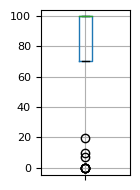

In [73]:
# Entrypoint Similarity

min, q1, q2, q3, max, iqr, lb, ub, mean, std = calculate_statistics(evaluations_database['entrypoint'])

print(f"Mean Entrypoint Similarity: {mean} %")
print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std}")

fig = plt.figure(figsize=(1.5, 2), dpi=100)
ax = renamed_evaluations.boxplot(column=['Entrypoint Similarity'])
ax.set_ylim([-5,104])
plt.xticks([1], [''])
plt.tight_layout() 
plt.savefig('entrypoint-boxplot.pdf', bbox_inches='tight')